## Coding challenge: market data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import os
os.chdir('/home/roman/Documents/Projects/Coding challenges/MarketData')

### 1. Explore and clean data

In [2]:
df = pd.read_csv('market_data.csv')
print(df.head(10))
print('\n')
print(df.info())

   analyst1  analyst2  analyst3      sector    market_cap  performance
0       3.0       1.0       3.0         NaN  6.976602e+11          0.0
1       2.0       4.0       1.0     finance  2.347422e+11         -1.0
2       5.0       3.0       3.0  technology  7.952640e+10          1.0
3       3.0       2.0       2.0  technology  6.805241e+10          0.0
4       4.0       3.0       1.0     finance  4.761488e+11          0.0
5       4.0       2.0       2.0         NaN  1.656686e+11          0.0
6       4.0       1.0       3.0  technology           NaN          1.0
7       4.0       1.0       5.0     finance           NaN          1.0
8       5.0       1.0       3.0  technology  1.210799e+10          1.0
9       4.0       5.0       3.0  technology  3.065097e+11          0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 6 columns):
analyst1       496 non-null float64
analyst2       482 non-null float64
analyst3       490 non-null float64
secto

In [3]:
# replace the missing analyst scores with the mean score of each analyst:
df['analyst1'] = df['analyst1'].fillna(np.round(np.mean(df['analyst1'])))
df['analyst2'] = df['analyst2'].fillna(np.round(np.mean(df['analyst2'])))
df['analyst3'] = df['analyst3'].fillna(np.round(np.mean(df['analyst3'])))
df['market_cap'] = df['market_cap'].fillna(np.mean(df['market_cap']))

In [4]:
# create dummies for categorical variable 'sector':
df_new = pd.concat([df.drop('sector', axis=1), pd.get_dummies(df['sector'])], axis=1)
print(df_new.head(10))

   analyst1  analyst2  analyst3    market_cap  performance  consumer  finance  \
0       3.0       1.0       3.0  6.976602e+11          0.0         0        0   
1       2.0       4.0       1.0  2.347422e+11         -1.0         0        1   
2       5.0       3.0       3.0  7.952640e+10          1.0         0        0   
3       3.0       2.0       2.0  6.805241e+10          0.0         0        0   
4       4.0       3.0       1.0  4.761488e+11          0.0         0        1   
5       4.0       2.0       2.0  1.656686e+11          0.0         0        0   
6       4.0       1.0       3.0  3.343481e+11          1.0         0        0   
7       4.0       1.0       5.0  3.343481e+11          1.0         0        1   
8       5.0       1.0       3.0  1.210799e+10          1.0         0        0   
9       4.0       5.0       3.0  3.065097e+11          0.0         0        0   

   healthcare  technology  
0           0           0  
1           0           0  
2           0           

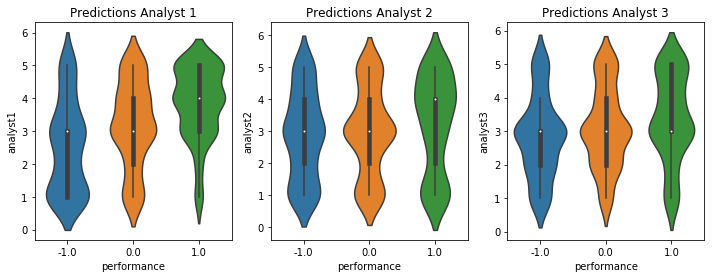

In [5]:
# visualize analyst prediction strngth with violin plots:
rcParams['figure.figsize'] = 12, 4
fig, axes = plt.subplots(nrows=1, ncols=3, squeeze=False)
sns.catplot(x='performance', y='analyst1', kind='violin', data=df_new, ax=axes[0,0])
axes[0,0].set_title('Predictions Analyst 1')
sns.catplot(x='performance', y='analyst2', kind='violin', data=df_new, ax=axes[0,1])
axes[0,1].set_title('Predictions Analyst 2')
sns.catplot(x='performance', y='analyst3', kind='violin', data=df_new, ax=axes[0,2])
axes[0,2].set_title('Predictions Analyst 3')
plt.tight_layout()
plt.close(2)
plt.close(3)
plt.close(4)
plt.show()

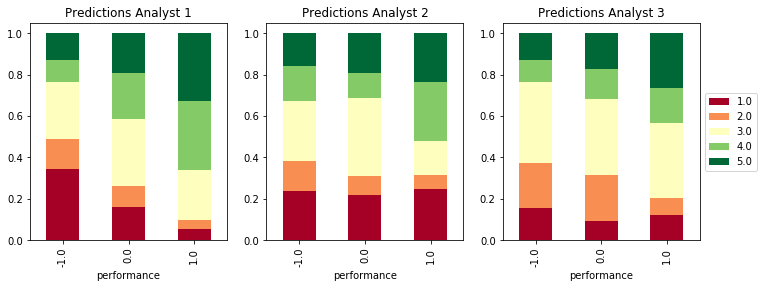

In [6]:
# Visualize analyst prediction strngth with bar charts:
rcParams['figure.figsize'] = 12, 4
df_analyst1 = pd.concat([df_new['performance'], pd.get_dummies(df_new['analyst1'])], axis=1) 
df_analyst1_pivot = df_analyst1.pivot_table(index='performance', aggfunc=np.mean)
df_analyst2 = pd.concat([df_new['performance'], pd.get_dummies(df_new['analyst2'])], axis=1) 
df_analyst2_pivot = df_analyst2.pivot_table(index='performance', aggfunc=np.mean)
df_analyst3 = pd.concat([df_new['performance'], pd.get_dummies(df_new['analyst3'])], axis=1) 
df_analyst3_pivot = df_analyst3.pivot_table(index='performance', aggfunc=np.mean)
fig, axes = plt.subplots(nrows=1, ncols=3, squeeze=False)
df_analyst1_pivot.plot.bar(stacked=True, cmap='RdYlGn', ax=axes[0,0], \
                           title='Predictions Analyst 1', legend=False)
df_analyst2_pivot.plot.bar(stacked=True, cmap='RdYlGn', ax=axes[0,1], \
                           title='Predictions Analyst 2', legend=False)
df_analyst3_pivot.plot.bar(stacked=True, cmap='RdYlGn', ax=axes[0,2], \
                           title='Predictions Analyst 3', legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [7]:
# Correlation between analyst prediction and performance:
cor_analyst1 = np.round(np.corrcoef(df_new['analyst1'], df_new['performance'])[0, 1], 3)
cor_analyst2 = np.round(np.corrcoef(df_new['analyst2'], df_new['performance'])[0, 1], 3)
cor_analyst3 = np.round(np.corrcoef(df_new['analyst3'], df_new['performance'])[0, 1], 3)
print('Correlation score vs performance analyst1: ' + str(cor_analyst1))
print('Correlation score vs performance analyst2: ' + str(cor_analyst2))
print('Correlation score vs performance analyst3: ' + str(cor_analyst3))

Correlation score vs performance analyst1: 0.368
Correlation score vs performance analyst2: 0.091
Correlation score vs performance analyst3: 0.168


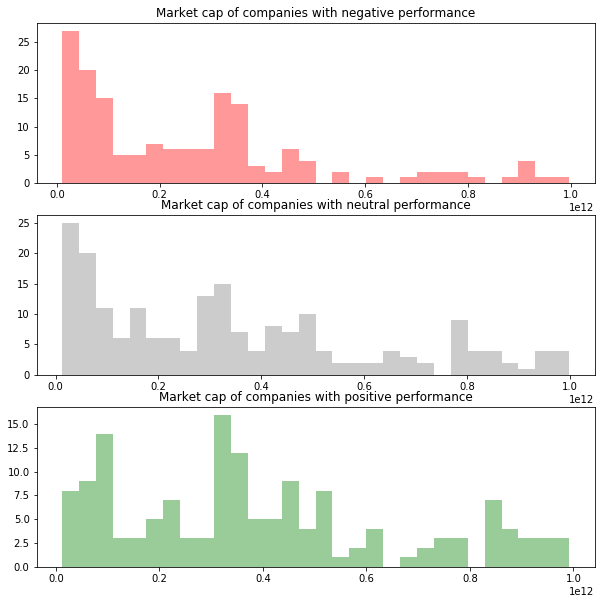

In [8]:
# Look at market cap vs performance:
df_new_neg = df_new[df_new['performance']==-1]
df_new_neu = df_new[df_new['performance']==0]
df_new_pos = df_new[df_new['performance']==1]
rcParams['figure.figsize'] = 10, 10
plt.subplot(3,1,1)
plt.hist(df_new_neg['market_cap'], bins=30, alpha=0.4, color='red')
plt.title('Market cap of companies with negative performance')
plt.subplot(3,1,2)
plt.hist(df_new_neu['market_cap'], bins=30, alpha=0.4, color='grey')
plt.title('Market cap of companies with neutral performance')
plt.subplot(3,1,3)
plt.hist(df_new_pos['market_cap'], bins=30, alpha=0.4, color='green')
plt.title('Market cap of companies with positive performance')
plt.show()

In [9]:
cor_market_cap = np.round(np.corrcoef(df_new['market_cap'], df_new['performance'])[0, 1], 3)
print('Correlation market cap vs performance: ' + str(cor_market_cap))

Correlation market cap vs performance: 0.199


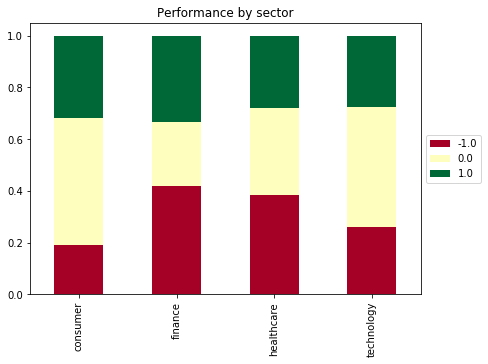

In [10]:
# look at performance per market sector:
df_sectors = df_new[['consumer', 'finance', 'healthcare', 'technology', 'performance']]
df_sectors_pivot = df_sectors.pivot_table(index='performance', aggfunc=np.sum)
df_sectors_pivot['consumer'] = df_sectors_pivot['consumer'] / sum(df_sectors_pivot['consumer'])
df_sectors_pivot['finance'] = df_sectors_pivot['finance'] / sum(df_sectors_pivot['finance'])
df_sectors_pivot['healthcare'] = df_sectors_pivot['healthcare'] / sum(df_sectors_pivot['healthcare'])
df_sectors_pivot['technology'] = df_sectors_pivot['technology'] / sum(df_sectors_pivot['technology'])
rcParams['figure.figsize'] = 7, 5
df_sectors_pivot.T.plot.bar(stacked=True, cmap='RdYlGn', title='Performance by sector')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [11]:
# Correlation between analyst prediction and performance:
cor_cons = np.round(np.corrcoef(df_new['consumer'], df_new['performance'])[0, 1], 3)
cor_fin = np.round(np.corrcoef(df_new['finance'], df_new['performance'])[0, 1], 3)
cor_health = np.round(np.corrcoef(df_new['healthcare'], df_new['performance'])[0, 1], 3)
cor_tech = np.round(np.corrcoef(df_new['technology'], df_new['performance'])[0, 1], 3)
print('Correlation consumer vs performance: ' + str(cor_cons))
print('Correlation finance vs performance: ' + str(cor_fin))
print('Correlation healthcare vs performance: ' + str(cor_health))
print('Correlation technology vs performance: ' + str(cor_tech))

Correlation consumer vs performance: 0.099
Correlation finance vs performance: -0.04
Correlation healthcare vs performance: -0.063
Correlation technology vs performance: 0.027
